# Clasificador de Vinos con KNN 🍷
Proyecto para predecir la calidad del vino usando K-Nearest Neighbors.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# 1. Cargar los datos
url = "https://raw.githubusercontent.com/rosinni/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv"
df = pd.read_csv(url, sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# Crear la columna 'label' categorizando 'quality'
def quality_to_label(q):
    if q <= 4:
        return 0  # baja
    elif q <= 6:
        return 1  # media
    else:
        return 2  # alta

df['label'] = df['quality'].apply(quality_to_label)

In [27]:
# 2. Separar variables independientes (X) y la variable objetivo (y)
X = df.drop(["label", "quality"], axis=1)
y = df["label"]


In [28]:
# 3. Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# 4. Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# 5. Entrenar el modelo con k inicial = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.84375

Matriz de confusión:
 [[  0  11   0]
 [  1 250  11]
 [  0  27  20]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.87      0.95      0.91       262
           2       0.65      0.43      0.51        47

    accuracy                           0.84       320
   macro avg       0.50      0.46      0.47       320
weighted avg       0.81      0.84      0.82       320



In [31]:
# 6. Búsqueda del mejor valor de k
k_range = range(1, 21)
accuracies = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_k_pred = model.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_k_pred))

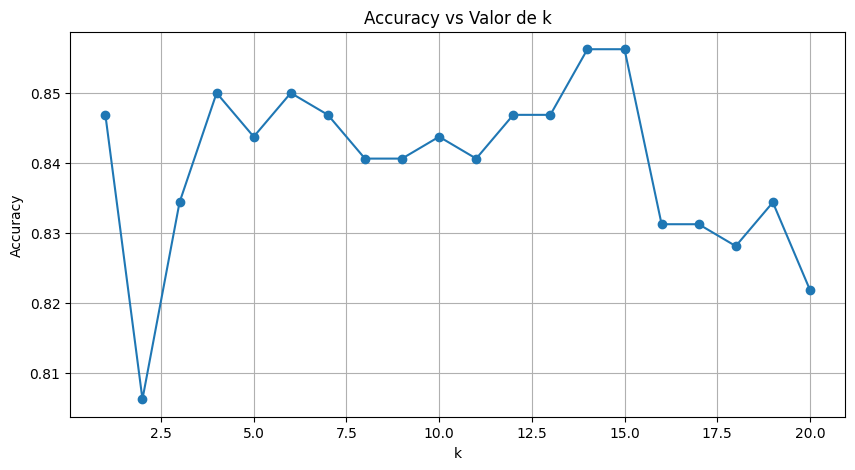

In [32]:
# 7. Graficar accuracy vs k
plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o')
plt.title("Accuracy vs Valor de k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [33]:
# 8. Elegir el mejor k
best_k = k_range[accuracies.index(max(accuracies))]
print(f"Mejor valor de k: {best_k}")

Mejor valor de k: 14


In [34]:
# 9. Entrenar modelo final
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=14)

In [35]:
# 10. Función para predecir calidad del vino
def predict_wine_quality(features):
    features_scaled = scaler.transform([features])
    pred = final_knn.predict(features_scaled)[0]
    if pred == 0:
        return "Este vino probablemente sea de baja calidad 🍷"
    elif pred == 1:
        return "Este vino probablemente sea de calidad media 🍷"
    else:
        return "Este vino probablemente sea de alta calidad 🍷"

In [36]:
# 11. Prueba de la función
resultado = predict_wine_quality([7.4, 0.7, 0.0, 1.9, 0.076,
                                  11.0, 34.0, 0.9978, 3.51, 0.56, 9.4])
print("\nPredicción de ejemplo:", resultado)


Predicción de ejemplo: Este vino probablemente sea de calidad media 🍷


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
